# COVID-19 Argentina por RJC

In [29]:
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import matplotlib.pyplot as plt
import seaborn as sns  # This allows us to easily and beautifully plot

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

### Abro archivo con los datos del gobierno, Tasa diaria de contagios y muertos, total de recuperados y de tests

In [30]:
f = 'Covid19_Arg.txt'    # Path to file containing the file
df = pd.read_csv(f)    # Read csv file with comma sepparation
df.tail(10)

,Fecha,Contagios,Muertos,Recuperados_tot,Tests
134,7/17/2020,4518,66,"49,780","519,281"
135,7/18/2020,3223,42,"52,607","531,753"
136,7/19/2020,4313,40,"54,105","541,238"
137,7/20/2020,3937,113,"55,913","552,306"
138,7/21/2020,5344,117,"58,598","563,513"
139,7/22/2020,5782,98,"60,531","578,202"
140,7/23/2020,6127,114,"62,815","593,044"
141,7/24/2020,5493,105,"65,447","609,262"
142,7/25/2020,4814,86,"68,022","623,893"
143,7/26/2020,4192,46,"70,518","640,000"


### Separo por comas y indexto los dias a la tabla para graficar facilmente

In [31]:
df.set_index(pd.DatetimeIndex(df['Fecha']),inplace=True)
df.drop('Fecha', axis=1, inplace=True)
#df['Recuperados_tot'] = pd.to_numeric(df['Recuperados_tot'])

df.tail(10) #ultimos 10 valores

,Contagios,Muertos,Recuperados_tot,Tests
Fecha,,,,
2020-07-17,4518,66,"49,780","519,281"
2020-07-18,3223,42,"52,607","531,753"
2020-07-19,4313,40,"54,105","541,238"
2020-07-20,3937,113,"55,913","552,306"
2020-07-21,5344,117,"58,598","563,513"
2020-07-22,5782,98,"60,531","578,202"
2020-07-23,6127,114,"62,815","593,044"
2020-07-24,5493,105,"65,447","609,262"
2020-07-25,4814,86,"68,022","623,893"


### Calculo la tasa diaria de recuperados, activos y tests

In [32]:
df['Recuperados'] = df['Recuperados_tot'].diff()
df['Tests_diario'] = df['Tests'].diff()
df['Activos']=df['Contagios']-df['Recuperados']-df['Muertos']
df['Activos'] = pd.to_numeric(df['Activos'])
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos
Fecha,,,,,,,
2020-07-17,4518,66,"49,780","519,281",660,"11,053","3,792"
2020-07-18,3223,42,"52,607","531,753","2,827","12,472",354
2020-07-19,4313,40,"54,105","541,238","1,498","9,485","2,775"
2020-07-20,3937,113,"55,913","552,306","1,808","11,068","2,016"
2020-07-21,5344,117,"58,598","563,513","2,685","11,207","2,542"
2020-07-22,5782,98,"60,531","578,202","1,933","14,689","3,751"
2020-07-23,6127,114,"62,815","593,044","2,284","14,842","3,729"
2020-07-24,5493,105,"65,447","609,262","2,632","16,218","2,756"
2020-07-25,4814,86,"68,022","623,893","2,575","14,631","2,153"


### Calculo el total de contagios, muertos y activos

In [33]:
df['Contagios_tot'] = df['Contagios'].cumsum()
df['Muertos_tot'] = df['Muertos'].cumsum()
df['Activos_tot']=df['Contagios_tot']-df['Recuperados_tot']-df['Muertos_tot']

pd.options.display.float_format = '{:,.0f}'.format #en enteros sin coma
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot
Fecha,,,,,,,,,,
2020-07-17,4518,66,"49,780","519,281",660,"11,053","3,792",119302,2179,"67,343"
2020-07-18,3223,42,"52,607","531,753","2,827","12,472",354,122525,2221,"67,697"
2020-07-19,4313,40,"54,105","541,238","1,498","9,485","2,775",126838,2261,"70,472"
2020-07-20,3937,113,"55,913","552,306","1,808","11,068","2,016",130775,2374,"72,488"
2020-07-21,5344,117,"58,598","563,513","2,685","11,207","2,542",136119,2491,"75,030"
2020-07-22,5782,98,"60,531","578,202","1,933","14,689","3,751",141901,2589,"78,781"
2020-07-23,6127,114,"62,815","593,044","2,284","14,842","3,729",148028,2703,"82,510"
2020-07-24,5493,105,"65,447","609,262","2,632","16,218","2,756",153521,2808,"85,266"
2020-07-25,4814,86,"68,022","623,893","2,575","14,631","2,153",158335,2894,"87,419"


### Grafico de tasa diaria

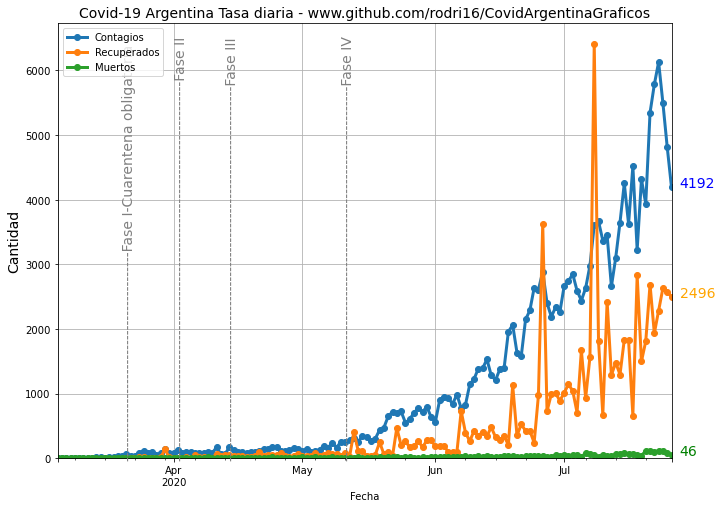

In [34]:
ax=df.plot(y=['Contagios','Recuperados','Muertos'], legend='true',style='-',grid='on',figsize=(11,8),linewidth=3, marker='o')

plt.title('Covid-19 Argentina Tasa diaria - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)
#ax.text('2020-4-2',280,'https://github.com/rodri16/CovidArgentinaGraficos',fontsize=10)
#agrega ultimo numero
#for var in (df.Contagios,df.Recuperados,df.Muertos):
#    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
#                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    
plt.annotate('%d' % df.Contagios.iloc[-1], xy=(1, df.Contagios.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='blue',size=14)
plt.annotate('%d' % df.Recuperados.iloc[-1], xy=(1, df.Recuperados.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='orange',size=14)
plt.annotate('%d' % df.Muertos.iloc[-1], xy=(1, df.Muertos.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='green',size=14)

    # Add labels to the plot
style = dict(size=14, color='gray')    
#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "-------------------------------------------Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "------------------------------------------------------------------------------Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "-----------------------------------------------------------------------------Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "-----------------------------------------------------------------------------Fase IV",rotation=90, **style)


#valor minimo eje y = 0
plt.gca().set_ylim(bottom=0)


#Salvo el grafico con la ultima fecha
name='Graficos/TasaDiariaLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

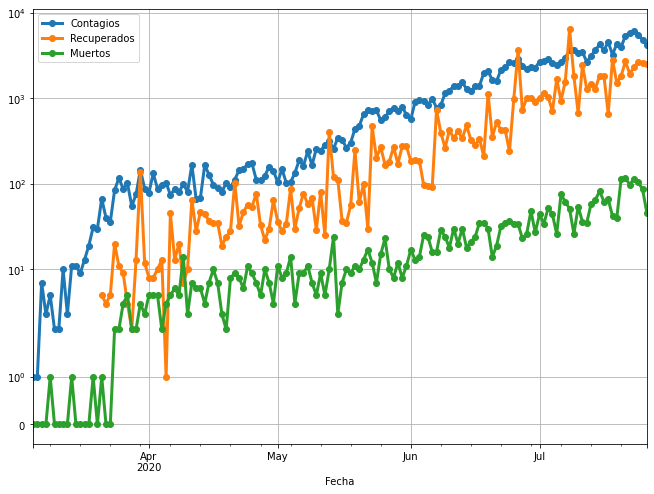

In [35]:
ax=df.plot(y=['Contagios','Recuperados','Muertos'], legend='true',style='-',logy="sym",grid='on',figsize=(11,8),linewidth=3, marker='o')


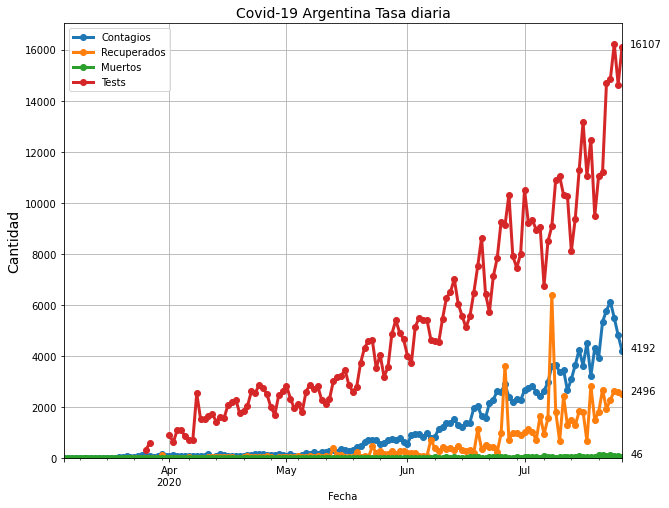

In [36]:
#agrego los tests pero no se ve nada (mejor en logaritmico)
ax=df.plot(y=['Contagios','Recuperados','Muertos','Tests_diario'], legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')

plt.title('Covid-19 Argentina Tasa diaria',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos","Tests"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)

#agrega ultimo numero
for var in (df.Contagios,df.Recuperados,df.Muertos,df.Tests_diario):
    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    
#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

#salvo grafico
name='Graficos/TasaDiariaFullLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Grafico de barras de las tasas diarias (solo otra manera de verlo)

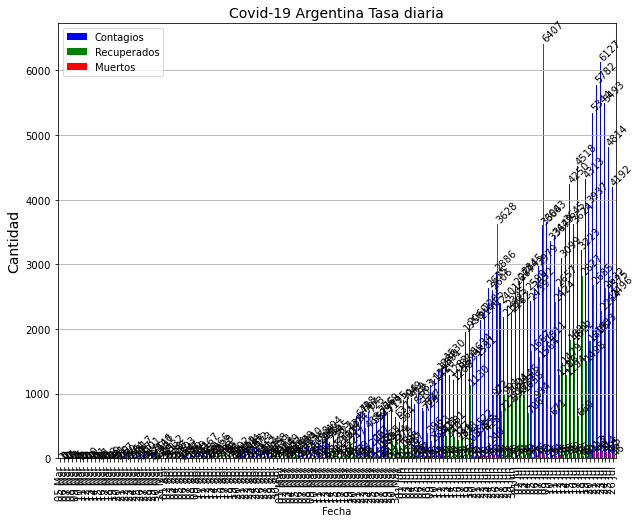

In [37]:
ax=df.plot.bar(y=['Contagios','Recuperados','Muertos'],color=['blue','green','red'],width=0.8, legend='true',figsize=(10,8))
#arreglo el formato de la fecha
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime("%d %b")))#arregla la fecha
#agrego grid
plt.grid(axis='y')
plt.title('Covid-19 Argentina Tasa diaria',fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.005),rotation=45)

    #salvo grafico
name='Graficos/TasaDiariaBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

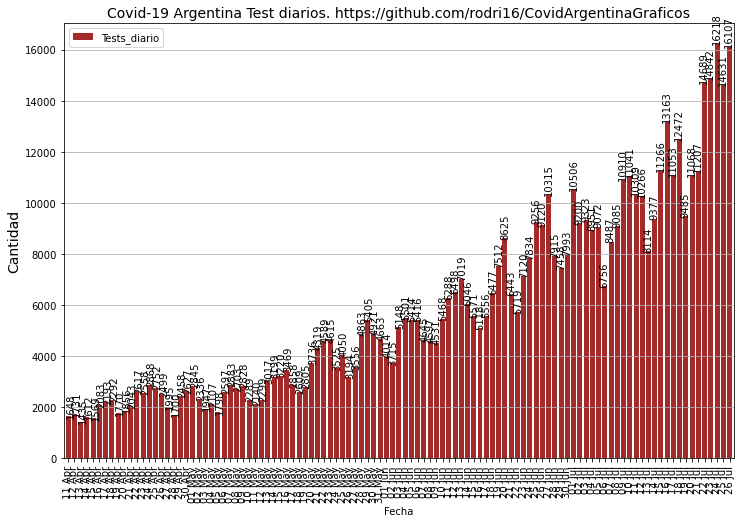

In [38]:
ax=df[df.index > '2020-4-10'].Tests_diario.plot.bar(color=['brown'],width=0.8, legend='true',figsize=(12,8))
#arreglo el formato de la fecha
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df[df.index > '2020-4-10'].index.to_series().dt.strftime("%d %b")))#arregla la fecha
#agrego grid
plt.grid(axis='y')
plt.title('Covid-19 Argentina Test diarios. https://github.com/rodri16/CovidArgentinaGraficos',fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.005),rotation=90)

    #salvo grafico
name='Graficos/TestDiarioBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico total contagios y Activos

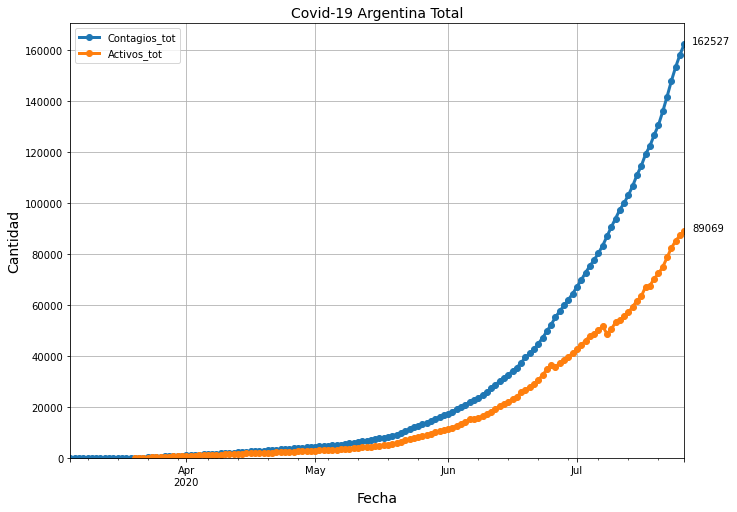

In [39]:
ax=df.plot(y=['Contagios_tot','Activos_tot'], style='-',grid='on',figsize=(11,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

#agrega ultimo numero
for var in (df.Contagios_tot,df.Activos_tot):
    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

#salvo grafico
name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Agrego total Muertos

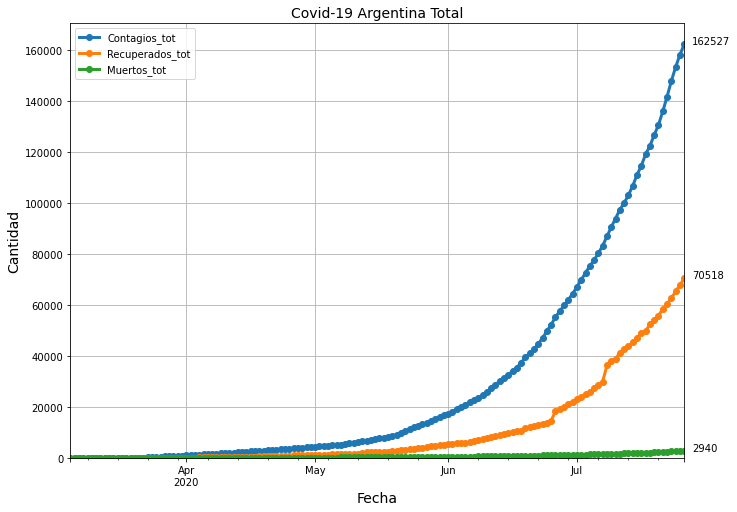

In [40]:
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot'], style='-',grid='on',figsize=(11,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(loc='upper left');
#numeros arriba de la barra
#for p in ax.patches:
#    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#agrega ultimo numero
for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Grafico Totales (el mas completo!!)

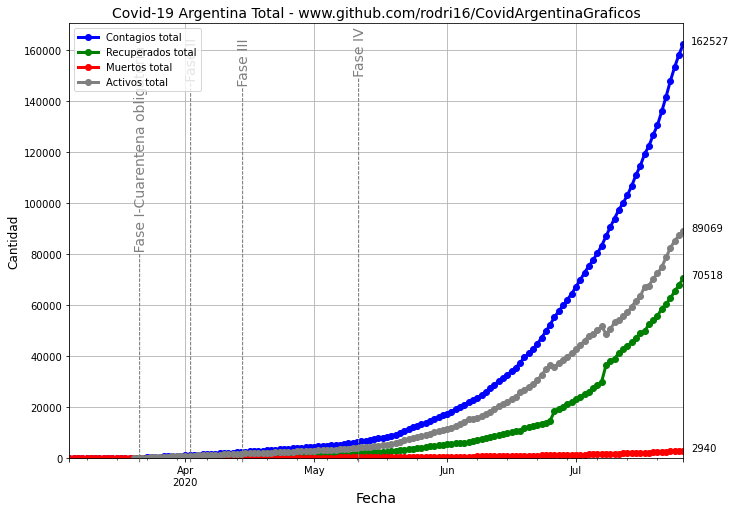

In [41]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot"],color=['blue',"green",'red','grey'], style='-',grid='on',figsize=(11,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=12)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total"],loc='upper left');
#ax.text('2020-4-2',5800,'www.github.com/rodri16/CovidArgentinaGraficos',fontsize=10)

#agrega ultimo valor
for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

# Add labels to the plot
style = dict(size=14, color='gray')

#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "-------------------------------------------Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "------------------------------------------------------------------------------Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "-----------------------------------------------------------------------------Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "-------------------------------------------------------------------------------Fase IV",rotation=90, **style)

#valor minimo en y = 0
plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

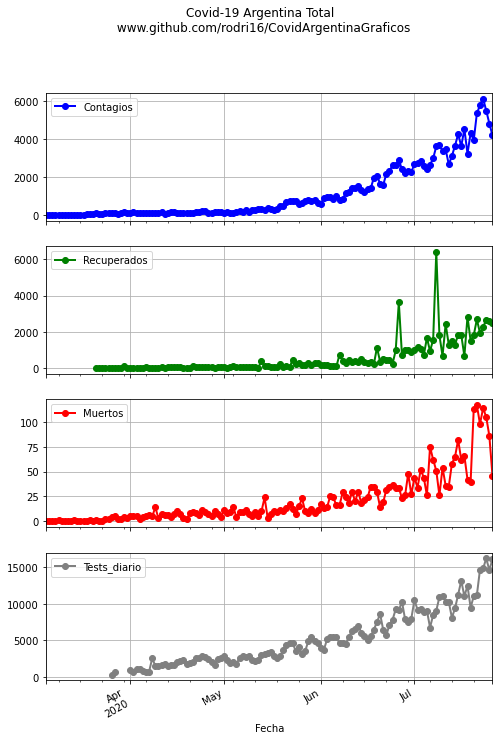

In [42]:
df.plot(y=['Contagios','Recuperados','Muertos','Tests_diario'],color=['blue',"green",'red','grey'],figsize=(8,12),subplots='true',style='.-',grid='on',title='Covid-19 Argentina Total \n www.github.com/rodri16/CovidArgentinaGraficos',linewidth=2, marker='o')#df[df['Contagios_tot'] > 100]
    
name='Graficos/Todos_diario_sub_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico de totales igual al anterior pero en escala logaritmica, se pueden ver un poco mejor lo valores chicos con respecto a los grandes pero es un poco tricky

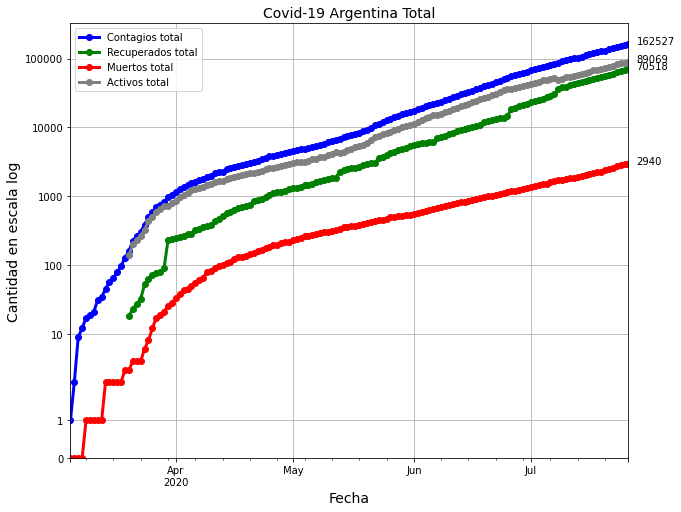

In [43]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot"],color=['blue',"green",'red','grey'],logy="sym", style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad en escala log', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Agrego los test en escala logaritmica, aca se pueden ver todos los datos juntos gracias a la escala log

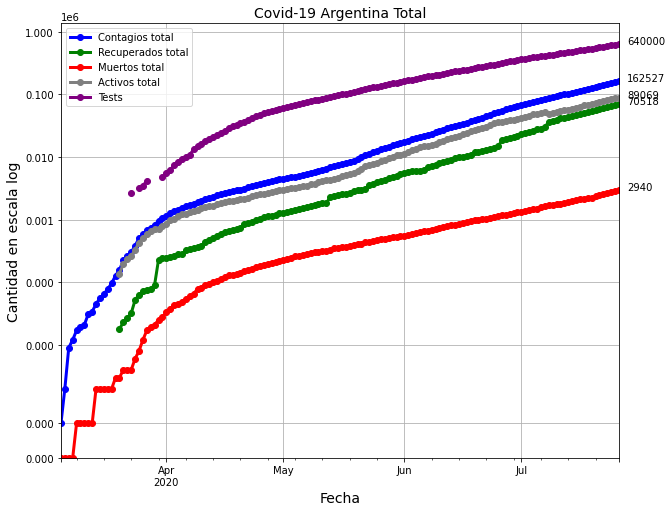

In [44]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"],color=['blue',"green",'red','grey','purple'],logy="sym", style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad en escala log', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_totTests_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Asi sin escala log, se ve la diferencia!!

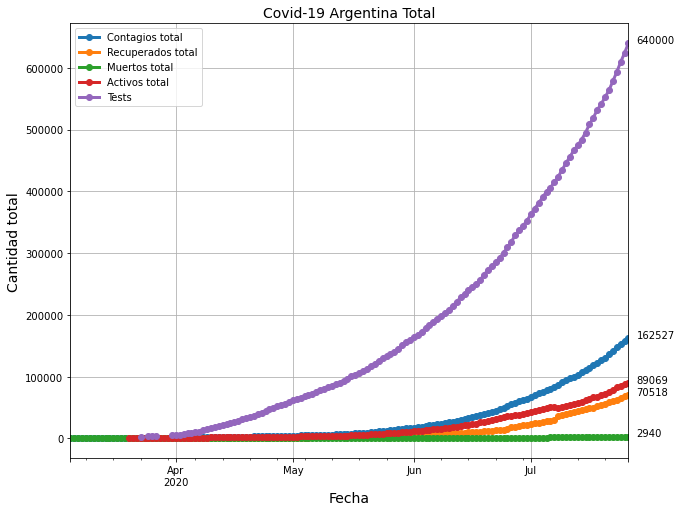

In [45]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"], style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad total', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')


### Grafico de barras del total de contagios y activos

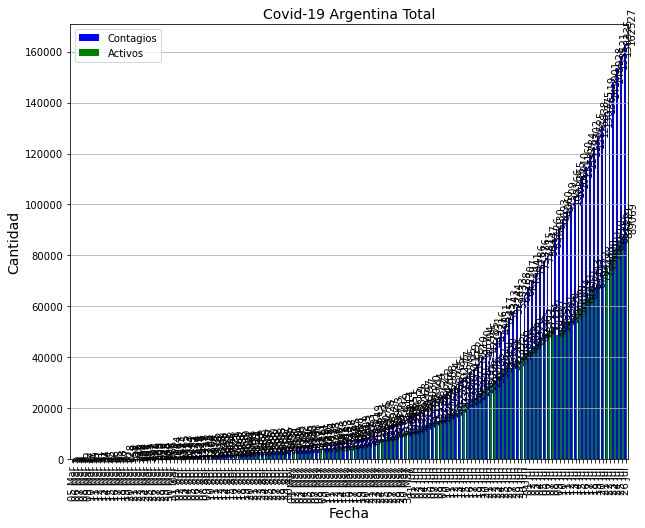

In [46]:
ax=df.plot.bar(y=['Contagios_tot','Activos_tot'],color=['blue','green'],figsize=(10,8),width=0.9)
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime("%d %b")))

plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(['Contagios', "Activos"],loc='upper left');
plt.grid(axis='y')

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)

name='Graficos/Contagios_totBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Subplots

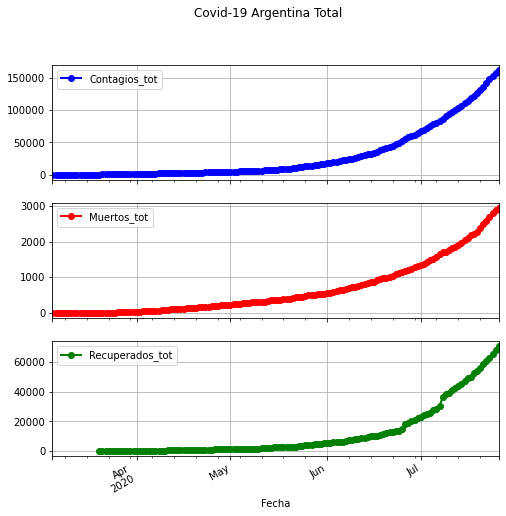

In [47]:
df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot'],color=['blue','red','green'],figsize=(8,8),subplots='true',style='.-',grid='on',title='Covid-19 Argentina Total',linewidth=2, marker='o')#df[df['Contagios_tot'] > 100]

name='Graficos/Contagios_tot100_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

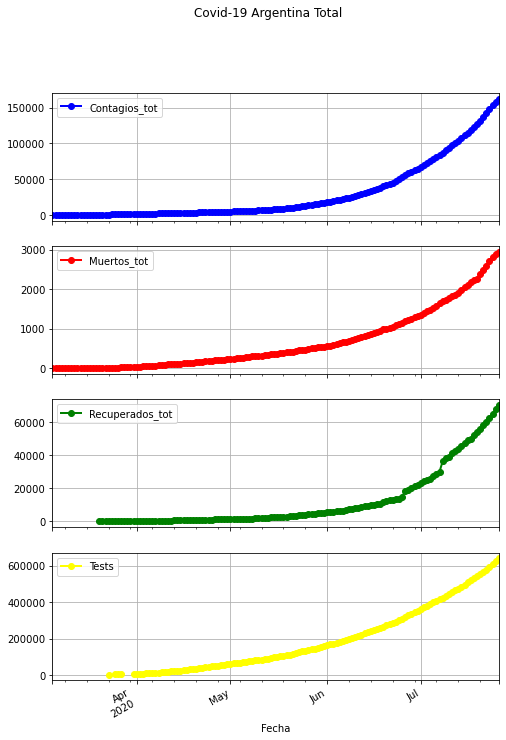

In [48]:
df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot',"Tests"],color=['blue','red','green','yellow'],figsize=(8,12),subplots='true',style='.-',grid='on',title='Covid-19 Argentina Total',linewidth=2, marker='o')#df[df['Contagios_tot'] > 100]

name='Graficos/Todos_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico en escala log

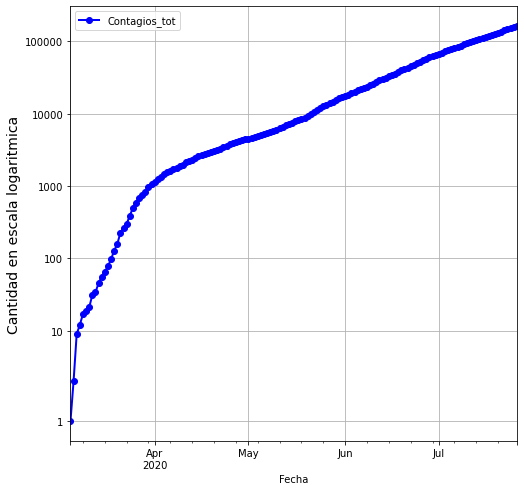

In [49]:
ax=df.plot(y=['Contagios_tot'],color=['blue'],figsize=(8,8),style='.-',grid='on',linewidth=2,logy="sym", marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad en escala logaritmica', fontsize=14)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

name='Graficos/Contagios_tot_log_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

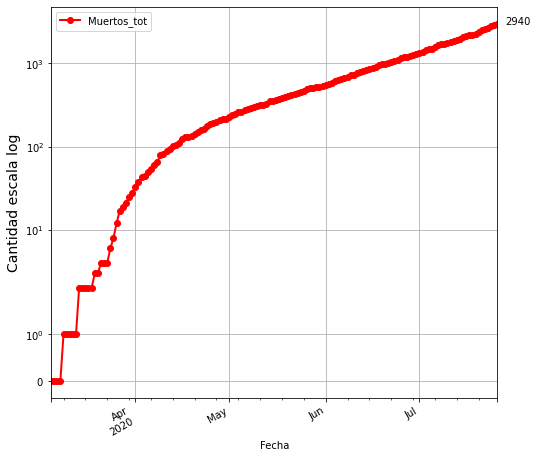

In [50]:
ax=df.plot(y=['Muertos_tot'],color=['red'],figsize=(8,8),subplots='true',style='.-',grid='on',logy="sym",linewidth=2, marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad escala log', fontsize=14)
plt.annotate('%d' % df.Muertos_tot.max(), xy=(1, df.Muertos_tot.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
name='Graficos/Muertos_tot10_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

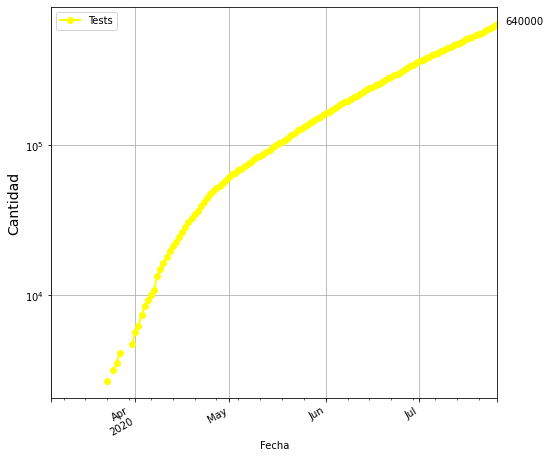

In [51]:
ax=df.plot(y=['Tests'],color=['yellow'],figsize=(8,8),subplots='true',style='.-',grid='on',logy="sym",linewidth=2, marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad', fontsize=14)
plt.annotate('%d' % df.Tests.max(), xy=(1, df.Tests.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
name='Graficos/Test_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Como quedo la tabla

In [52]:
df.describe()

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot
count,144,144,129,122,128,119,128,144,144,129
mean,"1,129",20,"12,464","198,225",551,"5,346",695,"29,765",658,"20,023"
std,"1,470",25,"18,190","179,093",916,"3,818",937,"41,898",753,"24,214"
min,1,0,18,"2,695",1,328,"-2,854",1,0,137
25%,98,5,840,"50,404",34,"2,318",76,"1,955",81,"2,153"
50%,309,10,"3,530","138,440",152,"4,531",276,"7,642",360,"7,378"
75%,"1,984",28,"13,816","316,441",680,"7,954","1,163","41,599",997,"34,920"
max,"6,127",117,"70,518","640,000","6,407","16,218","3,792","162,527","2,940","89,069"


## Meto todos los datos de la tabla en un archivo .csv  con la fecha

In [53]:
name='csv _datos_completos/Covid_arg_completo'+df.index[-1].strftime("%d%b")+'.csv'#str(df.index[-1])
df.to_csv(name, index=True)

### Probando interpolaciones...

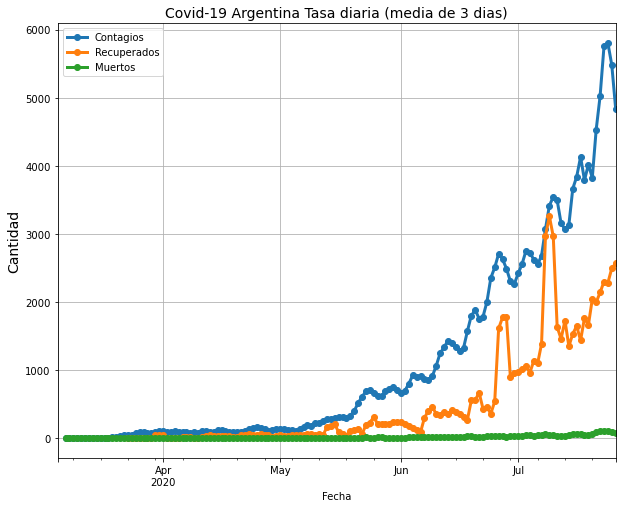

In [54]:
import numpy as np
N=3
df["Contagios_MA"]=df.Contagios.rolling(window=N).mean()
df["Recuperados_MA"]=df.Recuperados.rolling(window=N).mean()
df["Muertos_MA"]=df.Muertos.rolling(window=N).mean()
ax=df.plot(y=['Contagios_MA','Recuperados_MA','Muertos_MA'], legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Tasa diaria (media de 3 dias)',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)

name='Graficos/TasaDiariaMA_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Relacion entre nuevos contagios y gente testeada

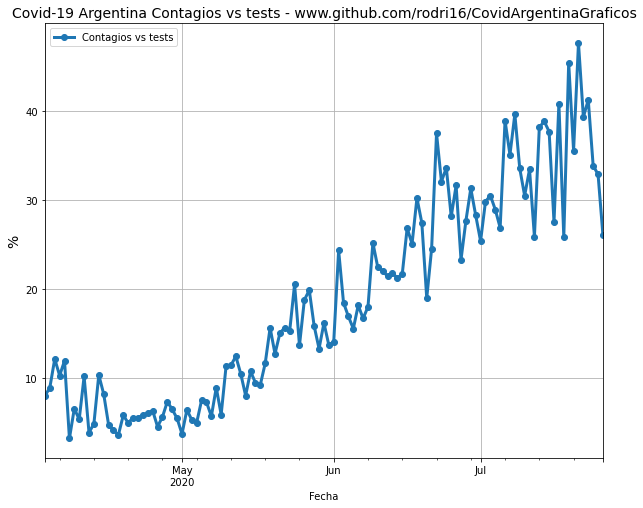

In [55]:
df['cont_test']=df['Contagios']/df['Tests_diario']*100
df[df.index > '2020-4-2']['cont_test'].plot(legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Contagios vs tests - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=14)
plt.legend(['Contagios vs tests'],loc='upper left');
plt.ylabel('%', fontsize=14)

name='Graficos/Tasa_Cont_Test'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

In [56]:
df.tail(5)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot,Contagios_MA,Recuperados_MA,Muertos_MA,cont_test
Fecha,,,,,,,,,,,,,,
2020-07-22,5782,98,"60,531","578,202","1,933","14,689","3,751",141901,2589,"78,781","5,021","2,142",109,39
2020-07-23,6127,114,"62,815","593,044","2,284","14,842","3,729",148028,2703,"82,510","5,751","2,301",110,41
2020-07-24,5493,105,"65,447","609,262","2,632","16,218","2,756",153521,2808,"85,266","5,801","2,283",106,34
2020-07-25,4814,86,"68,022","623,893","2,575","14,631","2,153",158335,2894,"87,419","5,478","2,497",102,33
2020-07-26,4192,46,"70,518","640,000","2,496","16,107","1,650",162527,2940,"89,069","4,833","2,568",79,26
